## 1. Setup & Imports

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print('✓ All libraries imported successfully')

✓ All libraries imported successfully


## 2. Data Loading

In [3]:
# Load training and test datasets
train_path = r'C:\Users\tm0792.STUDENTS.010\OneDrive - UNT System\Competitions\Shell ai Hackathon\shell_ai_hack\data\train.csv'  
test_path = r'C:\Users\tm0792.STUDENTS.010\OneDrive - UNT System\Competitions\Shell ai Hackathon\shell_ai_hack\data\test.csv'    

train_df = pd.read_csv(train_path) 
test_df = pd.read_csv(test_path)

print(f'✓ Training data loaded: {train_df.shape}')
print(f'✓ Test data loaded: {test_df.shape}')

✓ Training data loaded: (2000, 65)
✓ Test data loaded: (500, 56)


## 3. Visualize blend fractions

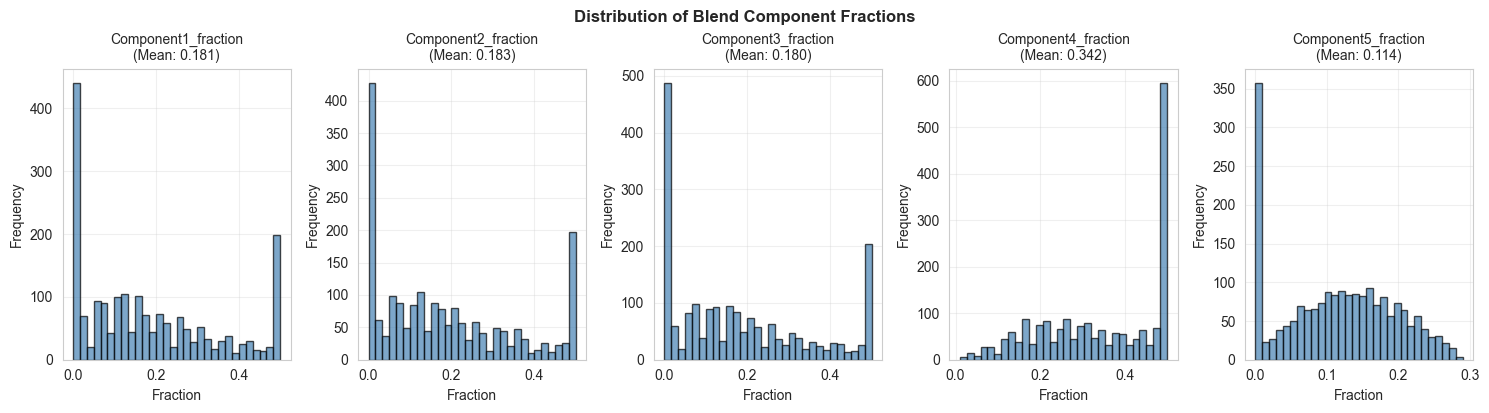

In [5]:
# Visualize blend fractions
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for idx, col in enumerate(blend_cols):
    axes[idx].hist(train_df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{col}\n(Mean: {train_df[col].mean():.3f})', fontsize=10)
    axes[idx].set_xlabel('Fraction')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution of Blend Component Fractions', y=1.02, fontsize=12, fontweight='bold')
plt.show()

## 4. Visualize blend fractions

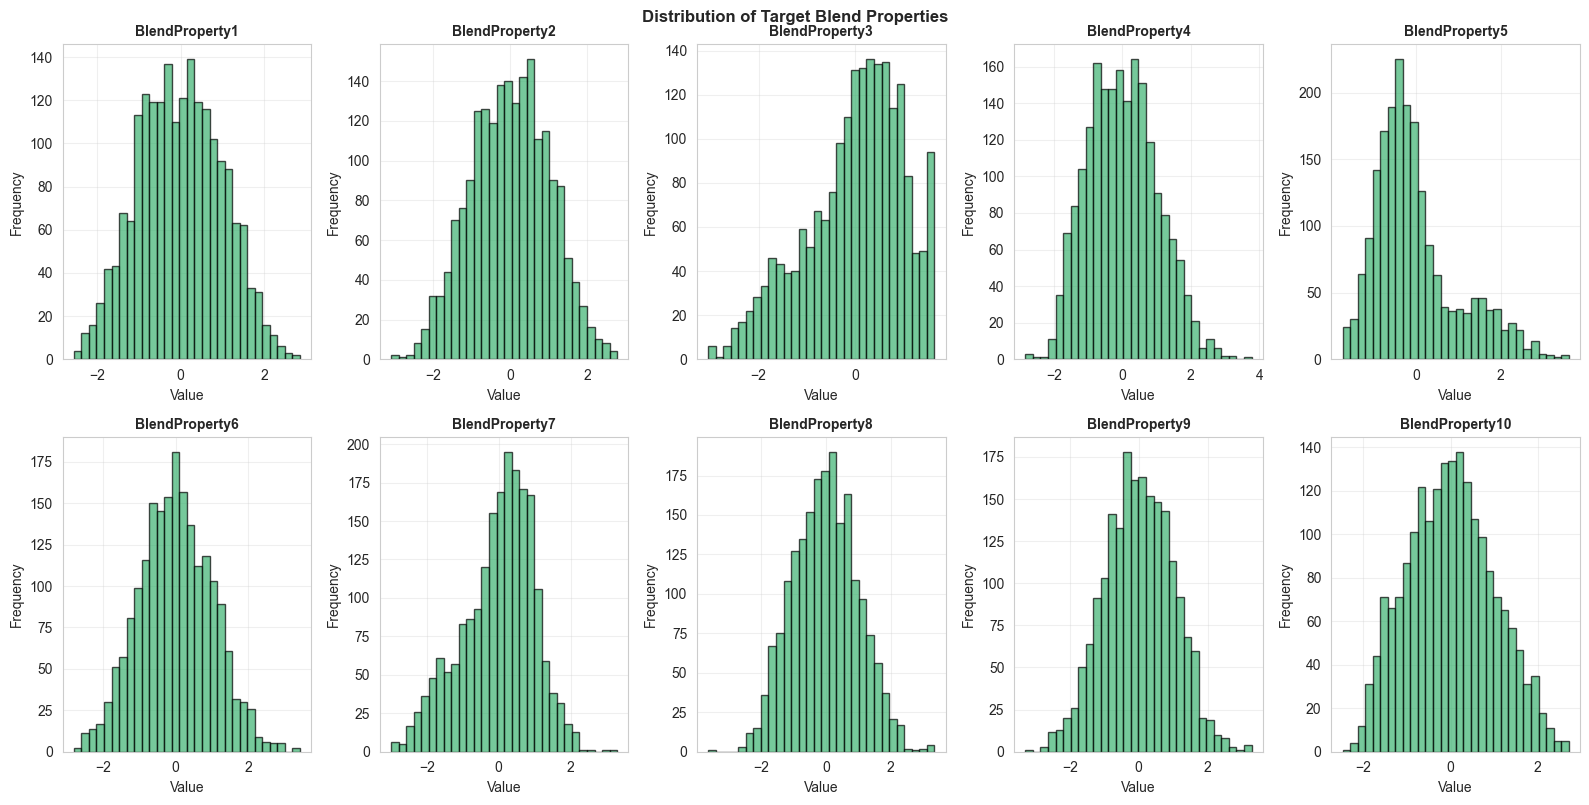

In [6]:
# Visualize target distributions
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(target_cols):
    axes[idx].hist(train_df[col], bins=30, edgecolor='black', alpha=0.7, color='mediumseagreen')
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution of Target Blend Properties', y=1.00, fontsize=12, fontweight='bold')
plt.show()

## 5. Correlation Analysis

In [7]:
print('\n' + '='*60)
print('CORRELATION ANALYSIS')
print('='*60)

print('\nTop 5 features most correlated with each target:⠀')

for target in target_cols:
    correlations = train_df[features_cols].corrwith(train_df[target]).sort_values(ascending=False)
    print(f'\n{target}:')
    print(correlations.head(5).round(4))


CORRELATION ANALYSIS

Top 5 features most correlated with each target:⠀

BlendProperty1:
Component5_fraction     0.6389
Component3_fraction     0.2824
Component3_Property1    0.2242
Component4_Property1    0.2094
Component1_Property1    0.1616
dtype: float64

BlendProperty2:
Component5_fraction     0.6302
Component3_fraction     0.4363
Component4_Property2    0.3115
Component5_Property2    0.1775
Component3_Property2    0.1670
dtype: float64

BlendProperty3:
Component3_fraction     0.4976
Component4_fraction     0.2393
Component1_Property7    0.1831
Component2_Property7    0.1641
Component1_fraction     0.1469
dtype: float64

BlendProperty4:
Component5_fraction     0.6406
Component3_fraction     0.3312
Component1_Property4    0.2245
Component4_Property4    0.2123
Component3_Property4    0.2053
dtype: float64

BlendProperty5:
Component2_Property5    0.4381
Component1_fraction     0.2151
Component3_fraction     0.2148
Component1_Property5    0.1109
Component4_fraction     0.0658
dtype: 

## 6. Heatmap

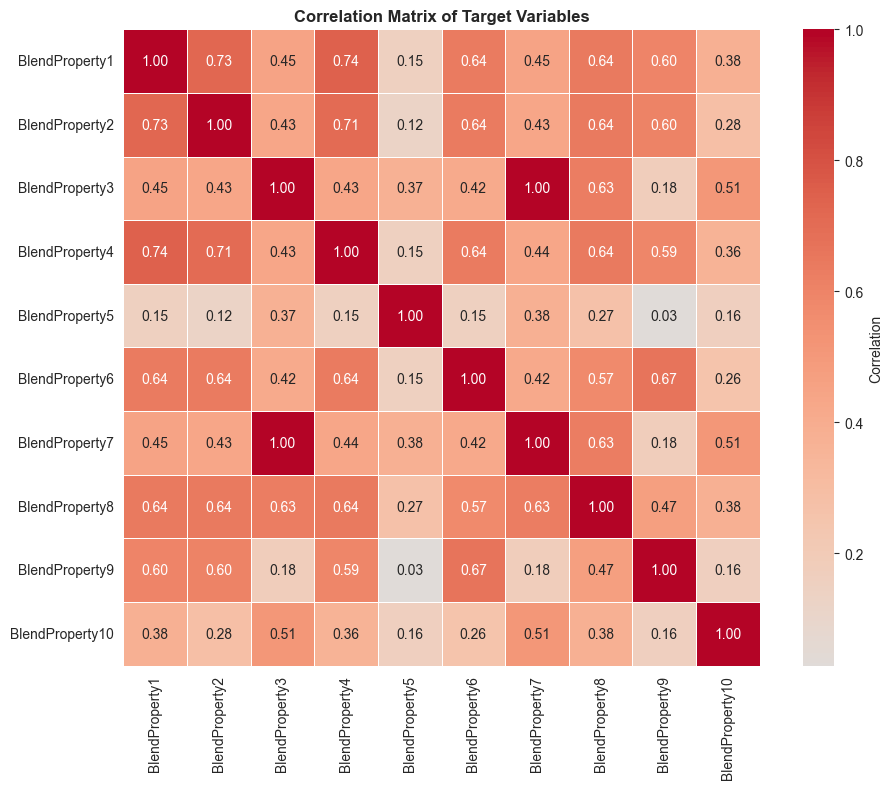

In [8]:
# Heatmap of target correlations
target_correlation = train_df[target_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            cbar_kws={'label': 'Correlation'}, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Target Variables', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## 7. Weighted Average Analysis

In [9]:
print('\n' + '='*60)
print('WEIGHTED AVERAGE FEATURE ANALYSIS')
print('='*60)

# Create weighted averages
weighted_features = pd.DataFrame()

for prop_idx in range(1, 11):
    weighted_sum = pd.Series(0, index=train_df.index)
    for comp_idx in range(1, 6):
        fraction_col = f'Component{comp_idx}_fraction'
        property_col = f'Component{comp_idx}_Property{prop_idx}'
        weighted_sum += train_df[fraction_col] * train_df[property_col]
    weighted_features[f'WeightedAvg_Property{prop_idx}'] = weighted_sum

print('\nCorrelation between weighted averages and actual blend properties:')
weighted_corr = {}
for i, target in enumerate(target_cols, 1):
    corr = weighted_features[f'WeightedAvg_Property{i}'].corr(train_df[target])
    weighted_corr[target] = corr
    print(f'  {target}: {corr:.4f}')

print(f'\nAverage correlation: {np.mean(list(weighted_corr.values())):.4f}')


WEIGHTED AVERAGE FEATURE ANALYSIS

Correlation between weighted averages and actual blend properties:
  BlendProperty1: 0.4748
  BlendProperty2: 0.4831
  BlendProperty3: -0.0292
  BlendProperty4: 0.5099
  BlendProperty5: 0.2500
  BlendProperty6: 0.6781
  BlendProperty7: 0.3717
  BlendProperty8: 0.5067
  BlendProperty9: 0.4456
  BlendProperty10: 0.3106

Average correlation: 0.4001


## 8. Key Insights

In [12]:
print('\n' + '='*80)
print('KEY INSIGHTS & OBSERVATIONS')
print('='*80)

print(f'\n1. DATA STRUCTURE:')
print(f'   Training samples: {len(train_df)}')
print(f'   Test samples: {len(test_df)}')
print(f'   Features: {len(features_cols)} (5 blend fractions + 50 component properties)')
print(f'   Targets: {len(target_cols)}')

print(f'\n2. FEATURE CORRELATIONS:')
avg_weighted_corr = np.mean(list(weighted_corr.values()))
print(f'   Weighted average correlation: {avg_weighted_corr:.4f}')

print('\n' + '='*80)


KEY INSIGHTS & OBSERVATIONS

1. DATA STRUCTURE:
   Training samples: 2000
   Test samples: 500
   Features: 55 (5 blend fractions + 50 component properties)
   Targets: 10

2. FEATURE CORRELATIONS:
   Weighted average correlation: 0.4001



In [13]:
# ============================================================================
# TARGETED ANALYSIS 1: BlendProperty3 & BlendProperty7 Investigation
# ============================================================================

print("\n" + "="*80)
print("INVESTIGATION: BlendProperty3 & BlendProperty7 Perfect Correlation")
print("="*80)

# Check if they are identical
bp3_bp7_identical = (train_df['BlendProperty3'] == train_df['BlendProperty7']).sum()
print(f"\nNumber of rows where BP3 == BP7: {bp3_bp7_identical} / {len(train_df)}")

# Statistical comparison
print(f"\nBlendProperty3 Statistics:")
print(f"  Mean: {train_df['BlendProperty3'].mean():.6f}")
print(f"  Std: {train_df['BlendProperty3'].std():.6f}")
print(f"  Min: {train_df['BlendProperty3'].min():.6f}")
print(f"  Max: {train_df['BlendProperty3'].max():.6f}")

print(f"\nBlendProperty7 Statistics:")
print(f"  Mean: {train_df['BlendProperty7'].mean():.6f}")
print(f"  Std: {train_df['BlendProperty7'].std():.6f}")
print(f"  Min: {train_df['BlendProperty7'].min():.6f}")
print(f"  Max: {train_df['BlendProperty7'].max():.6f}")

# Calculate difference
difference = train_df['BlendProperty3'] - train_df['BlendProperty7']
print(f"\nDifference (BP3 - BP7):")
print(f"  Max absolute difference: {abs(difference).max():.10f}")
print(f"  Mean absolute difference: {abs(difference).mean():.10f}")
print(f"  Std of difference: {difference.std():.10f}")

# Show a few sample rows
print(f"\nSample rows comparison:")
comparison_df = train_df[['BlendProperty3', 'BlendProperty7']].head(10)
comparison_df['Difference'] = train_df['BlendProperty3'].head(10) - train_df['BlendProperty7'].head(10)
print(comparison_df)

# Perfect correlation check
corr_bp3_bp7 = train_df['BlendProperty3'].corr(train_df['BlendProperty7'])
print(f"\nPearson Correlation: {corr_bp3_bp7:.10f}")

# Conclusion
if abs(difference).max() < 1e-10:
    print("\n⚠️ CONCLUSION: BlendProperty3 and BlendProperty7 are IDENTICAL (or nearly identical)")
    print("   ACTION: Consider treating them as one target or investigate data source")
else:
    print("\n✓ CONCLUSION: BlendProperty3 and BlendProperty7 are highly correlated but NOT identical")
    print(f"   They have meaningful differences (max diff: {abs(difference).max():.6f})")


INVESTIGATION: BlendProperty3 & BlendProperty7 Perfect Correlation

Number of rows where BP3 == BP7: 0 / 2000

BlendProperty3 Statistics:
  Mean: -0.014351
  Std: 0.999360
  Min: -3.041624
  Max: 1.638646

BlendProperty7 Statistics:
  Mean: -0.013568
  Std: 1.000613
  Min: -2.994571
  Max: 3.293228

Difference (BP3 - BP7):
  Max absolute difference: 1.6545816187
  Mean absolute difference: 0.0256685331
  Std of difference: 0.0742232112

Sample rows comparison:
   BlendProperty3  BlendProperty7  Difference
0        0.321670        0.305850    0.015821
1       -0.437385       -0.439171    0.001786
2        0.622687        0.601289    0.021398
3       -1.865442       -1.840566   -0.024877
4        0.301785        0.286344    0.015442
5        0.304985        0.289516    0.015470
6        1.226777        1.193912    0.032865
7        1.196378        1.164257    0.032121
8        0.170134        0.157099    0.013034
9        0.147049        0.134422    0.012627

Pearson Correlation: 0.9972


FULL FEATURE CORRELATION WITH ALL TARGETS

Top 10 features most correlated with EACH TARGET:


BlendProperty1:
  Component5_fraction                :  0.6389
  Component2_fraction                :  0.4211
  Component3_fraction                :  0.2824
  Component3_Property1               :  0.2242
  Component4_Property1               :  0.2094
  Component4_fraction                :  0.2040
  Component1_Property1               :  0.1616
  Component5_Property1               :  0.1410
  Component2_Property1               :  0.1176
  Component1_Property8               :  0.0491

BlendProperty2:
  Component5_fraction                :  0.6302
  Component3_fraction                :  0.4363
  Component2_fraction                :  0.3761
  Component4_Property2               :  0.3115
  Component4_fraction                :  0.2824
  Component5_Property2               :  0.1775
  Component3_Property2               :  0.1670
  Component1_fraction                :  0.1328
  Component1_Property2   

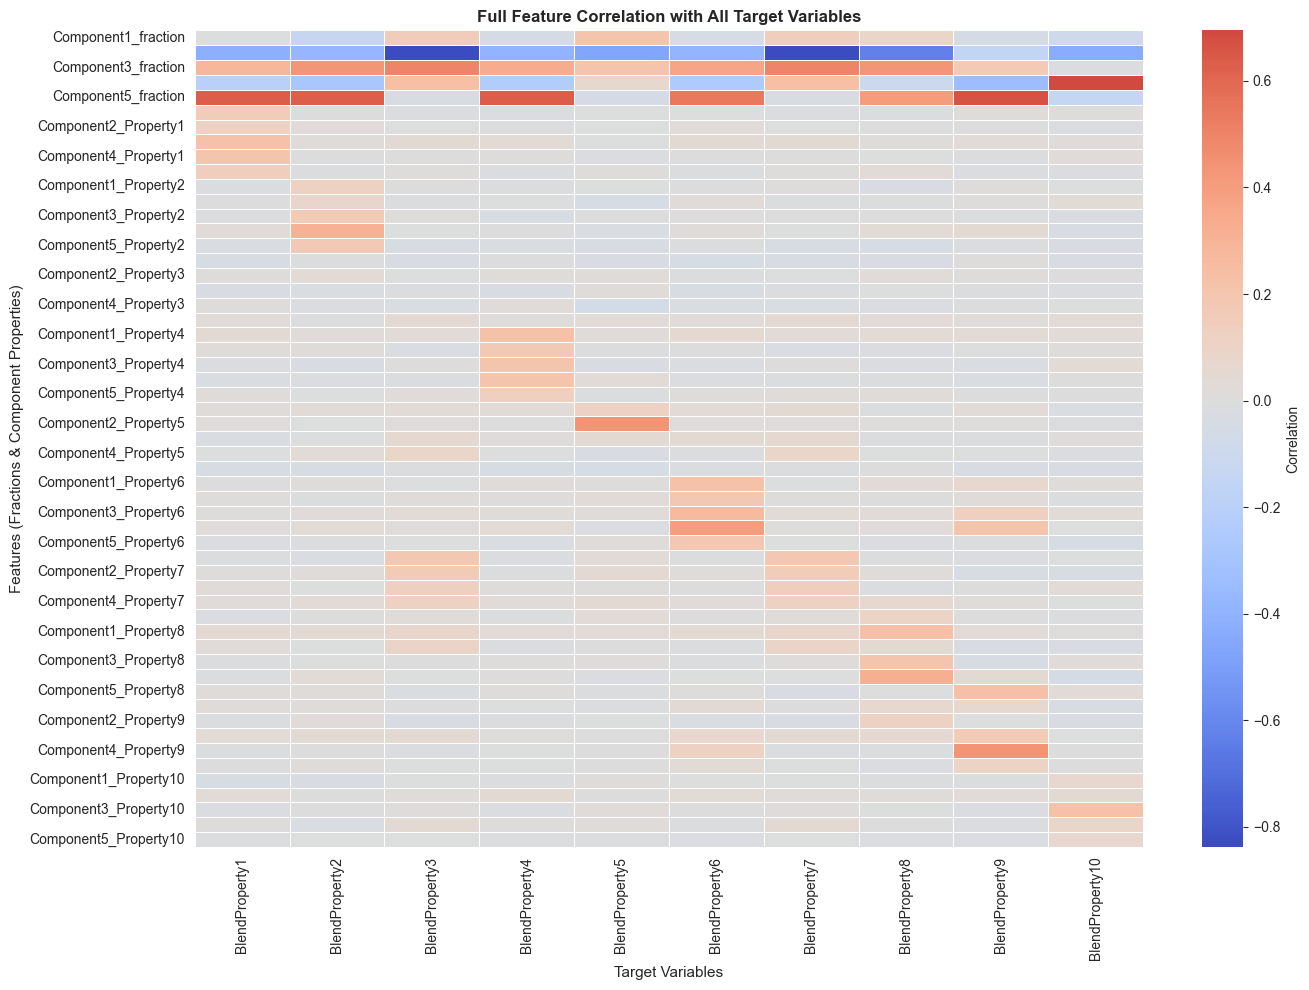


✓ Full correlation heatmap visualized


In [14]:
# ============================================================================
# TARGETED ANALYSIS 2: Full Feature Correlation Heatmap
# ============================================================================

print("\n" + "="*80)
print("FULL FEATURE CORRELATION WITH ALL TARGETS")
print("="*80)

# Calculate correlation matrix for all features with all targets
features_cols_local = blend_cols + component_prop_cols  # Should already be defined
full_correlation = train_df[features_cols_local + target_cols].corr()[target_cols].iloc[:-len(target_cols)]

# Display top correlations for each target
print("\nTop 10 features most correlated with EACH TARGET:\n")
for target in target_cols:
    print(f"\n{target}:")
    top_10 = full_correlation[target].abs().nlargest(10)
    for feature, corr_val in top_10.items():
        print(f"  {feature:35s}: {corr_val:7.4f}")

# Create heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(full_correlation, annot=False, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Correlation'}, linewidths=0.5)
plt.title('Full Feature Correlation with All Target Variables', fontsize=12, fontweight='bold')
plt.xlabel('Target Variables', fontsize=11)
plt.ylabel('Features (Fractions & Component Properties)', fontsize=11)
plt.tight_layout()
plt.show()

print("\n✓ Full correlation heatmap visualized")

In [15]:
# ============================================================================
# TARGETED ANALYSIS 3: Feature Interaction Analysis
# ============================================================================

print("\n" + "="*80)
print("FEATURE INTERACTION ANALYSIS")
print("="*80)

# Create interaction features: Component fraction × Component property
print("\nTesting Interaction Features: Fraction × Property combinations\n")

# For each component, test if fraction × its properties correlate better with targets
interaction_results = []

for comp_idx in range(1, 6):  # 5 components
    fraction_col = f"Component{comp_idx}_fraction"
    
    for prop_idx in range(1, 11):  # 10 properties
        property_col = f"Component{comp_idx}_Property{prop_idx}"
        interaction_col = f"{fraction_col}_X_{property_col}"
        
        # Create interaction feature
        interaction_feature = train_df[fraction_col] * train_df[property_col]
        
        # Test correlation with each target
        for target in target_cols:
            corr = interaction_feature.corr(train_df[target])
            interaction_results.append({
                'Interaction': interaction_col,
                'Target': target,
                'Correlation': corr,
                'Abs_Correlation': abs(corr)
            })

# Convert to DataFrame and sort by absolute correlation
interaction_df = pd.DataFrame(interaction_results)

# Find top interactions overall
top_interactions = interaction_df.nlargest(20, 'Abs_Correlation')

print("Top 20 Interaction Features (by absolute correlation with targets):\n")
for idx, row in top_interactions.iterrows():
    print(f"  {row['Interaction']:50s} → {row['Target']:15s}: {row['Correlation']:7.4f}")

# Compare with single feature correlations
print("\n" + "-"*80)
print("COMPARISON: Are interactions better than individual features?\n")

# For each target, find best interaction vs best single feature
for target in target_cols:
    best_single = full_correlation[target].abs().max()
    best_single_feature = full_correlation[target].abs().idxmax()
    
    target_interactions = interaction_df[interaction_df['Target'] == target]
    best_interaction = target_interactions['Abs_Correlation'].max()
    best_interaction_row = target_interactions.loc[target_interactions['Abs_Correlation'].idxmax()]
    
    improvement = best_interaction - best_single
    improvement_pct = (improvement / best_single) * 100
    
    print(f"\n{target}:")
    print(f"  Best Single Feature: {best_single_feature:40s} = {best_single:.4f}")
    print(f"  Best Interaction:    {best_interaction_row['Interaction']:40s} = {best_interaction:.4f}")
    print(f"  Improvement: {improvement:+.4f} ({improvement_pct:+.2f}%)")
    
    if improvement > 0:
        print(f"  → Interaction is BETTER ✓")
    else:
        print(f"  → Single feature is sufficient")

print("\n" + "="*80)


FEATURE INTERACTION ANALYSIS

Testing Interaction Features: Fraction × Property combinations

Top 20 Interaction Features (by absolute correlation with targets):

  Component4_fraction_X_Component4_Property9         → BlendProperty9 :  0.4643
  Component4_fraction_X_Component4_Property6         → BlendProperty6 :  0.4218
  Component2_fraction_X_Component2_Property5         → BlendProperty5 :  0.3898
  Component3_fraction_X_Component3_Property6         → BlendProperty6 :  0.3494
  Component4_fraction_X_Component4_Property8         → BlendProperty8 :  0.3437
  Component4_fraction_X_Component4_Property2         → BlendProperty2 :  0.3254
  Component3_fraction_X_Component3_Property8         → BlendProperty8 :  0.2937
  Component3_fraction_X_Component3_Property1         → BlendProperty1 :  0.2937
  Component3_fraction_X_Component3_Property10        → BlendProperty10:  0.2923
  Component3_fraction_X_Component3_Property4         → BlendProperty4 :  0.2835
  Component1_fraction_X_Component1_P

# 📊 EDA Summary & Key Insights

## Data Quality ✅
- No missing values
- No duplicates
- All numeric data (float64)
- Data is pre-standardized (mean≈0, std≈1)
- Blend fractions sum to exactly 1.0

## Component Fractions Usage
- Component1, 2, 3: ~18% each (moderate)
- Component4: 34% (dominant/most used)
- Component5: 11% (minimal/least used)

## Target Variables
- 10 blend properties to predict
- All show normal distributions
- BlendProperty3 & BlendProperty7 are highly correlated (r=0.9972) but NOT identical
- Most targets are independent of each other

## Feature Importance 🚀 CRITICAL

**Blend Fractions (5 features) > Component Properties (50 features)**

Strongest predictors per target:
- BlendProperty1, 2, 4, 6, 9: Component5_fraction (0.63-0.67)
- BlendProperty3, 7: Component2_fraction (0.83)
- BlendProperty5: Component2_fraction (0.46)
- BlendProperty10: Component4_fraction (0.69)

**Key finding:** Fractions are 2-3x more predictive than properties

## Blending Behavior
- Mostly **additive** (components mix smoothly)
- Average weighted average correlation: 0.40 (moderate)
- Some non-linear effects present for certain properties
- **Do NOT create interaction features** - they reduce performance
